In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
burn = 100
data = np.load('train_QGS_normalize1.npz')
xx = data['x'][burn:]
yy = data['y'][burn:]

In [3]:
itrain = 15000
ival = -1000
xx_train, yy_train = xx[:itrain], yy[:itrain]
xx_val, yy_val = xx[ival:], yy[ival:]

In [11]:
key_features = [(0,'psi_a_1'), (21, 'psi_o_2'), (29, 'theta_o_2')]
nfeat = len(key_features)

## Time series plot

First we plot the predictor time series for the key variables

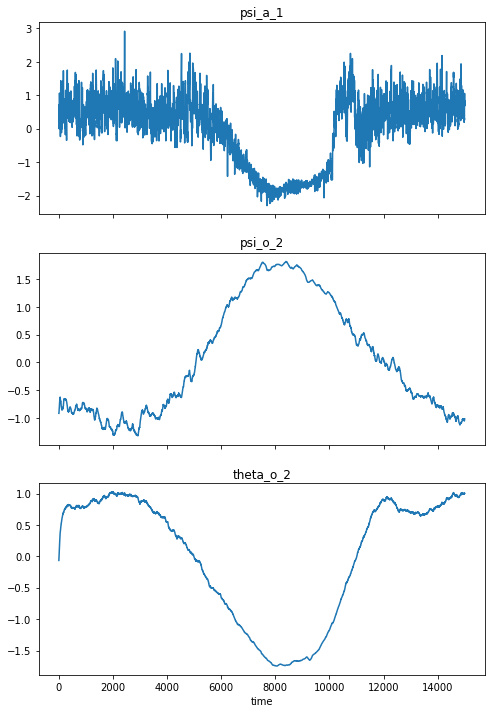

In [18]:
fig, ax = plt.subplots(nrows=nfeat,figsize=(8,4*nfeat),sharex='all')


for i, (ivar, name) in enumerate(key_features):
    ax[i].plot(xx_train[:,ivar])
    ax[i].set_title(name)

ax[-1].set_xlabel('time');

Then, we plot the error (target) time series for the key variables. It is expected (but no guaranty) that the error presents also some temporal identifiable mode of variability.

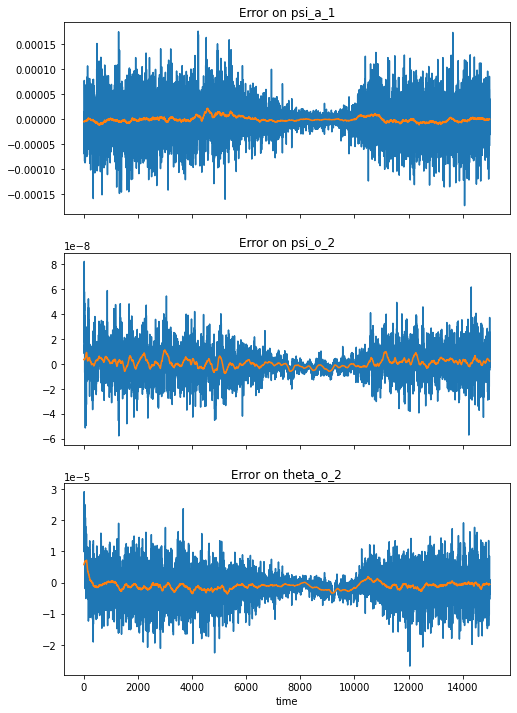

In [27]:
fig, ax = plt.subplots(nrows=nfeat,figsize=(8,4*nfeat),sharex='all')

#For smoothing:
kernel_size = 200
kernel = np.ones(kernel_size) / kernel_size

for i, (ivar, name) in enumerate(key_features):
    ax[i].plot(yy_train[:,ivar])
    ax[i].set_title(f'Error on {name}')

    data_convolved = np.convolve(yy_train[:,ivar], kernel, mode='same')
    ax[i].plot(data_convolved)
ax[-1].set_xlabel('time');

Comment: Even though the intensity of error evolves in time, no obvious longer term variability is visible

## Scatter plots


If the error is predictable, there should be a "relationship"(like a correlation) between the predictor and the target error. We plot the target error of key variables with respect with the same key variable

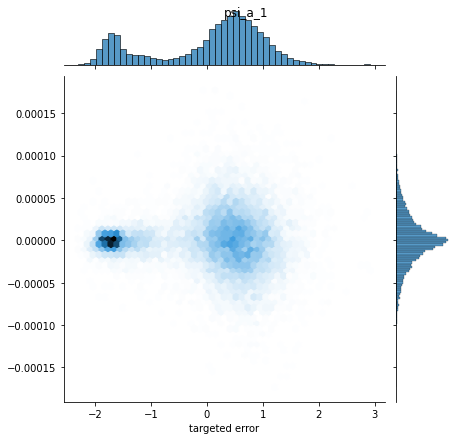

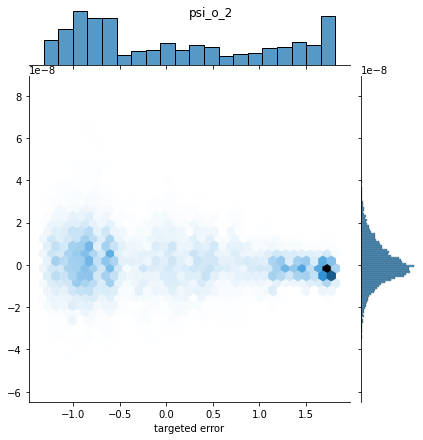

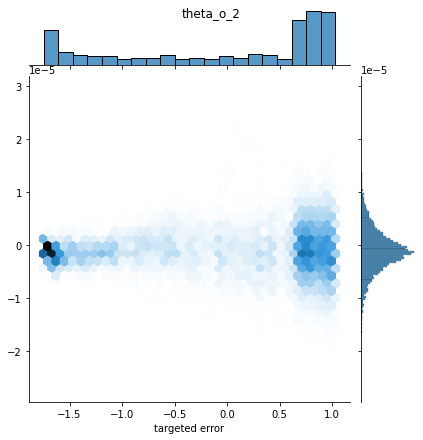

In [25]:


for i, (ivar, name) in enumerate(key_features):
    sns.jointplot(x=xx_train[:,ivar], y=yy_train[:,ivar],
              kind='hex')
    plt.xlabel('Predictor')
    plt.xlabel('targeted error')
    plt.suptitle(name)

Comment: I don't see any obvious relationship, which means that there is no simple link between x_true - x_truncated and x_true